# Introduction to Predictive Analytics Models

In [1]:
# using the iris dataset to perfrom simple predictive model

from sklearn import datasets

In [2]:
import pandas as pd
import numpy as np


In [5]:
iris = datasets.load_iris()
iris_features = iris.data
iris_target = iris.target

In [6]:
iris_df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
iris_df["target"] = iris.target_names[iris.target]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
# Performing a classsification task to predict the species of the flower 

from sklearn.neighbors import KNeighborsClassifier

In [8]:
flower_classifier = KNeighborsClassifier(n_neighbors=3)

In [9]:
# training the estimator

flower_classifier.fit(X=iris_features,y=iris_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [10]:
# The features must be 2d array

new_flower1 = np.array([[5.1,3.0,1.1,0.5]])
new_flower2 = np.array([[6.0,2.9,4.5,1.1]])


# Classification codes
- 0 ==> setosa
- 1 ==> versicolor
- 2 ==> virginica

In [11]:
flower_classifier.predict(new_flower1)

array([0])

In [12]:
flower_classifier.predict(new_flower2)

array([1])

In [13]:
new_flowers = np.array([[5.1,3.0,1.1,0.5] , [6.0,2.9,4.5,1.1] ])
predictions = flower_classifier.predict(new_flowers)
predictions

array([0, 1])

# Building a regression model using scikit-learn

In [14]:
# using a random forest model to make predictions
%matplotlib inline

In [15]:
student = pd.read_csv("https://raw.githubusercontent.com/PacktPublishing/Become-a-python-data-analyst/master/data/student/student.csv",sep=";")
student.rename(columns={"sex":"gender"},inplace=True)
student["alcohol_index"] = (5*student["Dalc"] + 2*student["Walc"])/7

# Alcohol consumption level
student["acl"] = student["alcohol_index"] <= 2
student["acl"] = student["acl"].map({True:"Low",False:"High"})

In [16]:
student.head(3)

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,alcohol_index,acl
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,4,0,11,11,1.000000,Low
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,2,9,11,11,1.000000,Low
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,6,12,13,12,2.285714,High


In [17]:
features = ["gender","famsize","age","studytime","famrel","goout","freetime","G3"]
target = "acl"

In [18]:
# using one-hot encoding to transform variables

# For gender: Female will be 0, Male will be 1
student["gender"] = student["gender"].map({"F":0,"M":1}).astype(int)

# For famsize: "LE3" - Less or equal to 3 will be 0. "GT3" - greater than 3 will be one 
student["famsize"] = student["famsize"].map({"LE3":0,"GT3":1}).astype(int)

# for acl: "Low" will be 0, "High" will be 1
student["acl"] = student["acl"].map({"Low":0,"High":1}).astype(int)


In [19]:
x = student[features].values
y = student[target].values

In [20]:
student["acl"].value_counts(normalize=True)

0    0.744222
1    0.255778
Name: acl, dtype: float64

In [21]:
# building a predictive model called logistic regression

from sklearn.linear_model import LogisticRegression

In [22]:
student_classifier_logreg = LogisticRegression(C=2)

In [23]:
student_classifier_logreg.fit(x,y)

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
# using cross-validation to evaluate the model

student["predictions_logreg"] = student_classifier_logreg.predict(x)

In [25]:
confusion_matrix = pd.crosstab(student["predictions_logreg"],student["acl"])
confusion_matrix

acl,0,1
predictions_logreg,,
0,453,105
1,30,61


In [29]:
ac = (confusion_matrix.iloc[0,0] + confusion_matrix.iloc[1,1]) / student.shape[0]

print("Accuracy: {}".format(ac))

Accuracy: 0.7919876733436055


In [30]:
# building a more complex model called RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

In [31]:
student_classifier_rf = RandomForestClassifier()

In [33]:
student_classifier_rf.fit(x,y)
student["predictions_rf"] = student_classifier_rf.predict(x)

In [34]:
confusion_matrix = pd.crosstab(student["predictions_rf"],student["acl"])
confusion_matrix

acl,0,1
predictions_rf,,
0,479,13
1,4,153


In [35]:
ac = (confusion_matrix.iloc[0,0] + confusion_matrix.iloc[1,1]) / student.shape[0]
print("Accuracy: {}".format(ac))

Accuracy: 0.9738058551617874


In [40]:
# trying the model 
#["gender","famsize","age","studytime","famrel","goout","freetime","G3"]

new_student = np.array([[0,1,18,2,1,5,5,16]])
prediction = student_classifier_rf.predict(new_student)

print("The model predict that the student belongs to the:")

if prediction == 1:
    print("HIGH Alcohol Consumption group")
else:
    print("LOW Alcohol Consumption group")

The model predict that the student belongs to the:
LOW Alcohol Consumption group


# Regression model to predict house prices 

In [46]:
housing = pd.read_csv("https://raw.githubusercontent.com/PacktPublishing/Become-a-python-data-analyst/master/data/house_train.csv")
housing["Age"] = housing["YrSold"] - housing["YearBuilt"]

In [47]:
#using linear regression to predict housing prices

counts = housing["Neighborhood"].value_counts()
more_than_30 = list(counts[counts>30].index)
housing = housing.loc[housing["Neighborhood"].isin(more_than_30)]

In [48]:
features = ["CentralAir","LotArea","OverallQual","OverallCond","1stFlrSF","2ndFlrSF","BedroomAbvGr","Age"]
target = "SalePrice"

# Creating dummy variables

# Neighborhood

dummies_nb = pd.get_dummies(housing["Neighborhood"],drop_first=True)
housing = pd.concat([housing,dummies_nb],axis=1)

# CentralAir

housing["CentralAir"] = housing["CentralAir"].map({"N":0,"Y":1}).astype(int) 

In [49]:
features += list(dummies_nb.columns)

In [50]:
x = housing[features].values
y = housing[target].values
n = housing.shape[0]

In [51]:
y_mean = np.mean(y)
y_mean

180167.63358778626

In [52]:
RMSE_null_model = np.sqrt(np.sum((y-y_mean)**2)/n)
RMSE_null_model

78032.94485454109

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
regressor = LinearRegression()

In [55]:
regressor.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
housing["predictions"] = regressor.predict(x)

In [57]:
y_pred = housing["predictions"].values

In [58]:
# root-mean-square error

RMSE_regessor = np.sqrt(np.sum((y-y_pred)**2)/n)
RMSE_regessor

33729.21817336611

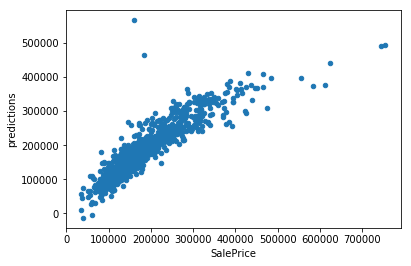

In [59]:
housing.plot.scatter(x="SalePrice",y="predictions");

# Making a prediction for a new house

In [61]:
new_house = np.array([[0, 12000, 6, 6, 1200, 500, 3, 5, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]])
prediction = regressor.predict(new_house)
print("For a house with the following characteristics:\n")
for feature,feature_value in zip(features,new_house[0]):
    if feature_value > 0:
        print("{}: {}".format(feature,feature_value))
print("\nThe predicted value for the house is {:,}".format(round(prediction[0])))

For a house with the following characteristics:

LotArea: 12000
OverallQual: 6
OverallCond: 6
1stFlrSF: 1200
2ndFlrSF: 500
BedroomAbvGr: 3
Age: 5
Timber: 1

The predicted value for the house is 214,944.0
